Wrangling generically useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from time import sleep
import requests

set_style("whitegrid")

## Week 01 - Data cleaning + preprocessing 
Pulling data from the fencing database and storing as a dataframe

In [7]:
response = requests.get("https://fencingdatabase.com/api/clips/answers")

<Response [200]>

In [8]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Create dataframe and seperate each weapon

In [10]:
test = pd.json_normalize(response.json()['answers'])
test

,stats_id,weapon,initiated,strip_location,body_location,created_date
0,DimwittedThisCoypu,epee,fotl,fotr_half,front_arm,1591130715
1,KnobbySereneFreshwatereel,epee,fotl,middle,front_arm,1591144965
2,KnobbySereneFreshwatereel,epee,fotl,fotr_half,front_arm,1591156220
3,AnyVelvetyIvorybackedwoodswallow,epee,fotl,fotl_warning_box,torso,1591555506
4,EcstaticSilverHammerheadshark,epee,fotl,fotr_half,front_arm,1592342612
...,...,...,...,...,...,...
95,PeacefulDimBarb,epee,fotr,fotr_half,head,1595628885
96,FluidPointedIridescentshark,epee,fotr,middle,torso,1595628914
97,MilkyNeighboringGreathornedowl,epee,fotl,middle,torso,1595628941
98,NeglectedSpanishCavy,epee,fotr,fotl_half,front_arm,1595628973


Looks like the test worked, now to loop through the entire database to create a comprehensive dataframe.

In [45]:
loop = list(range(0, 7900, 100)) # The API processes requests in batches of 100, so this let's us request data appropriately 
print(loop)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800]


In [55]:
fencing = []
numbers_worked = []
url = ("https://fencingdatabase.com/api/clips/answers/")
for number in loop:
    print('Asking Scott for ' + str(number)) # Prints each new request to help track progress
    try:
        response = requests.get("https://fencingdatabase.com/api/clips/answers/" + str(number))
        fencing.merge(pd.json_normalize(response.json()['answers']))
        numbers_worked.append(number)
    except:
        continue
    sleep(2)

Asking Scott for 0
Asking Scott for 100
Asking Scott for 200
Asking Scott for 300
Asking Scott for 400
Asking Scott for 500
Asking Scott for 600
Asking Scott for 700
Asking Scott for 800
Asking Scott for 900
Asking Scott for 1000
Asking Scott for 1100
Asking Scott for 1200
Asking Scott for 1300
Asking Scott for 1400
Asking Scott for 1500
Asking Scott for 1600
Asking Scott for 1700
Asking Scott for 1800
Asking Scott for 1900
Asking Scott for 2000
Asking Scott for 2100
Asking Scott for 2200
Asking Scott for 2300
Asking Scott for 2400
Asking Scott for 2500
Asking Scott for 2600
Asking Scott for 2700
Asking Scott for 2800
Asking Scott for 2900
Asking Scott for 3000
Asking Scott for 3100
Asking Scott for 3200
Asking Scott for 3300
Asking Scott for 3400
Asking Scott for 3500
Asking Scott for 3600
Asking Scott for 3700
Asking Scott for 3800
Asking Scott for 3900
Asking Scott for 4000
Asking Scott for 4100
Asking Scott for 4200
Asking Scott for 4300
Asking Scott for 4400
Asking Scott for 4500


In [59]:
total_df = pd.concat([fencing[0],fencing[1]])
for i in fencing[2:]:
    total_df = pd.concat([total_df,i])

In [61]:
total_df.head()
total_df.to_csv("fencingdb_dump.csv")

In [44]:
fencing = pd.read_csv("./data/fencingdb_dump.csv") #Checkpoint so we no longer need to scrape data

In [35]:
#Testing to see how the touch data is sorted
#Touch id is stored as stats_id in the dataframe
response = requests.get("https://fencingdatabase.com/api/clips/DimwittedThisCoypu")
touch = pd.json_normalize(response.json())
touches = touch.iloc[0:0] #Decided to make a new dataframe to fill in later with all the relevant columns
touches


,gfycat_gfy_id,tournament_id,weapon,gender,fotl_name,fotr_name,left_score,right_score,touch,download_url


In [37]:
# Now we need to loop through the ID of each touch and create a df that contains those info
id = list(fencing['stats_id'])
url = ("https://fencingdatabase.com/api/clips/")
for i in id:
    print('Asking Scott for ' + str(i)) # Prints each new request to help track progress
    try:
        response = requests.get("https://fencingdatabase.com/api/clips/" + i)
        touches = pd.concat([touches, pd.json_normalize(response.json())])
    except:
        continue
    sleep(1)

Asking Scott for DimwittedThisCoypu
Asking Scott for KnobbySereneFreshwatereel
Asking Scott for KnobbySereneFreshwatereel
Asking Scott for AnyVelvetyIvorybackedwoodswallow
Asking Scott for EcstaticSilverHammerheadshark
Asking Scott for SpotlessBoldBarnswallow
Asking Scott for ThankfulUnsteadyCockerspaniel
Asking Scott for PeskyOffbeatAldabratortoise
Asking Scott for ReasonableNippyAoudad
Asking Scott for HiddenKnobbyKoodoo
Asking Scott for InsecureRealBadger
Asking Scott for SnoopyUncommonAnophelesmosquito
Asking Scott for AppropriateOldfashionedEstuarinecrocodile
Asking Scott for IllShockedBasenji
Asking Scott for DimwittedGreatHarvestmouse
Asking Scott for HandsomeDopeyHound
Asking Scott for OpulentMadIbizanhound
Asking Scott for IdolizedUnpleasantLadybird
Asking Scott for AbleIdealisticIndianringneckparakeet
Asking Scott for DefinitiveAnimatedAssassinbug
Asking Scott for InformalRealisticIbadanmalimbe
Asking Scott for HelplessWhoppingCrocodile
Asking Scott for IllfatedFineAnemonecra

In [40]:
touches.to_csv('./data/touches.csv')

In [ ]:
touches = pd.read_csv('./data/touches.csv') #Checkpoint so we no longer need to scrape data

In [51]:
#Combine the touches and fencing dataframes to create a comprehensive frame
fencing_clean = fencing.drop_duplicates(subset=['stats_id'], keep = False) # Removing duplicates because I forgot to index everything
touches_clean = touches.drop_duplicates(subset=['gfycat_gfy_id'], keep = False)

In [59]:
fencing_clean['gfycat_gfy_id'] = fencing_clean['stats_id']

In [60]:
combined_df = fencing_clean.merge(touches_clean, on = 'gfycat_gfy_id')
combined_df

,Unnamed: 0,stats_id,weapon_x,initiated,strip_location,body_location,created_date,gfycat_gfy_id,tournament_id,weapon_y,gender,fotl_name,fotr_name,left_score,right_score,touch,download_url
0,0,DimwittedThisCoypu,epee,fotl,fotr_half,front_arm,1591130715,DimwittedThisCoypu,budapestwch2019,epee,female,Sarra Besbes,Jung Hyojung,7,12,right,https://clips.fencingdatabase.com/budapestwch2...
1,4,EcstaticSilverHammerheadshark,epee,fotl,fotr_half,front_arm,1592342612,EcstaticSilverHammerheadshark,budapestwch2019,epee,male,Niko Vuorinen,Uyama Satoru,3,7,right,https://clips.fencingdatabase.com/budapestwch2...
2,5,SpotlessBoldBarnswallow,sabre,fotr,middle,head,1592344478,SpotlessBoldBarnswallow,budapestsabre2019,sabre,male,Iulian Teodosiu,James Honeybone,11,14,right,https://clips.fencingdatabase.com/budapestsabr...
3,6,ThankfulUnsteadyCockerspaniel,sabre,fotr,fotl_half,torso,1592344528,ThankfulUnsteadyCockerspaniel,budapestsabre2019,sabre,male,Veniamin Reshetnikov,James Honeybone,13,14,right,https://clips.fencingdatabase.com/budapestsabr...
4,7,PeskyOffbeatAldabratortoise,epee,NaN,fotl_warning_box,hand,1592396229,PeskyOffbeatAldabratortoise,dubai2019,epee,female,Irina Embrich,Man Wai Vivian Kong,9,8,right,https://clips.fencingdatabase.com/dubai2019/Pe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,97,innocentSarplaninacPhytosaurs,epee,fotl,middle,torso,1711197681,innocentSarplaninacPhytosaurs,champsepee2023,epee,male,Romain Cannone,Vadim Anokhin,1,0,left,https://clips.fencingdatabase.com/champsepee20...
4960,98,shinyGreenTreeFrogSumatranOrangutan,epee,fotl,middle,torso,1711227672,shinyGreenTreeFrogSumatranOrangutan,vancouverepee2023,epee,,Francisco Limardo,Neisser Loyola,9,13,right,https://clips.fencingdatabase.com/vancouverepe...
4961,0,GenuineCoarseBushsqueaker,sabre,fotl,middle,head,1711395099,GenuineCoarseBushsqueaker,budapestsabre2021,sabre,None,Vincent Anstett,Yousef Alshamlan,5,5,right,https://clips.fencingdatabase.com/budapestsabr...
4962,1,ImpracticalZanyFrogmouth,epee,fotl,middle,torso,1711446028,ImpracticalZanyFrogmouth,heidenheim2017,epee,male,Li Zhen,Bogdan Nikishin,14,11,left,https://clips.fencingdatabase.com/heidenheim20...


In [61]:
combined_df.to_csv('./data/fencing-touches-combine.csv')

In [62]:
#Split all the weapons because they can't really be analyzed together
epee = combined_df[combined_df['weapon_x'] == "epee"] # seperate the epee values
epee.to_csv("./data/epee.csv") # then save to csv
saber = combined_df[combined_df['weapon_x'] == "sabre"] # seperate the saber values
saber.to_csv("./data/saber.csv")
foil = combined_df[combined_df['weapon_x'] == "foil"] # seperate the foil values
foil.to_csv("./data/foil.csv")

## 02 - Exploratory data analysis + visualizations 

<Axes: xlabel='body_location'>

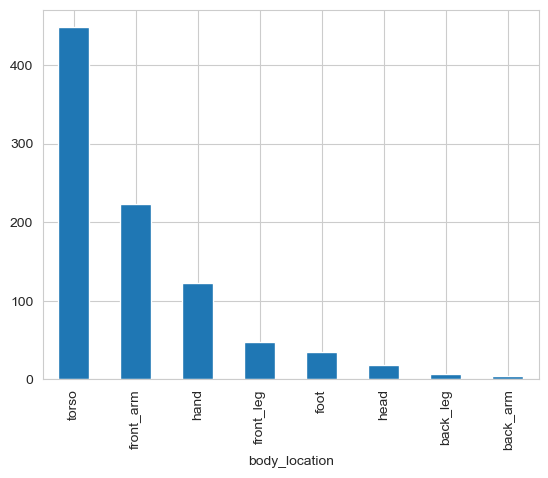

In [8]:
epee["body_location"].value_counts().plot(kind="bar")

<Axes: xlabel='body_location'>

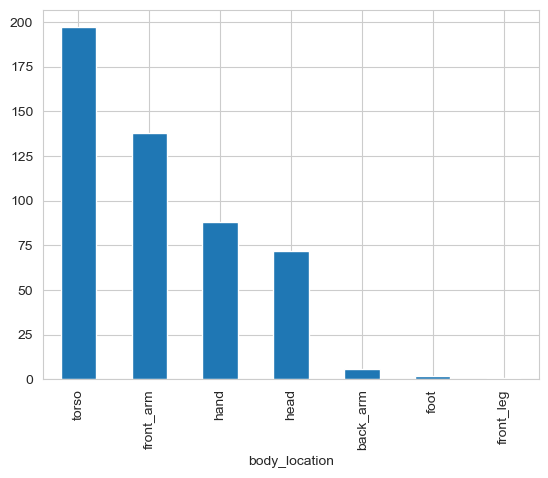

In [9]:
saber["body_location"].value_counts().plot(kind="bar")

<Axes: xlabel='body_location'>

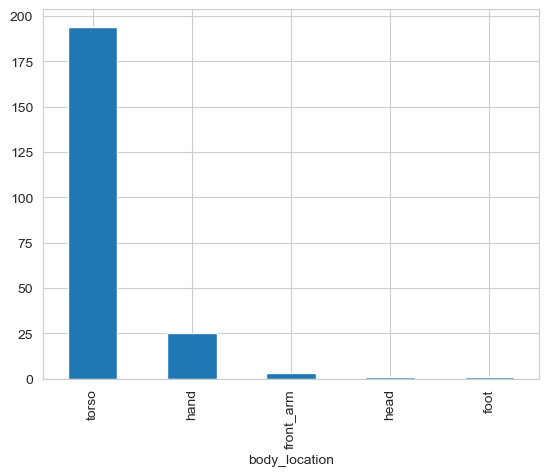

In [7]:
foil["body_location"].value_counts().plot(kind="bar")

Interesting that foil has any values other than those that score.

<Axes: xlabel='strip_location'>

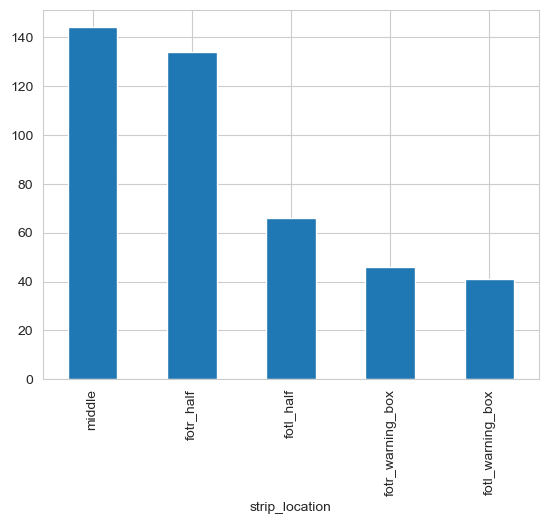

In [10]:
epee_fotl = epee[epee['initiated'] == 'fotl']
epee_fotl['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

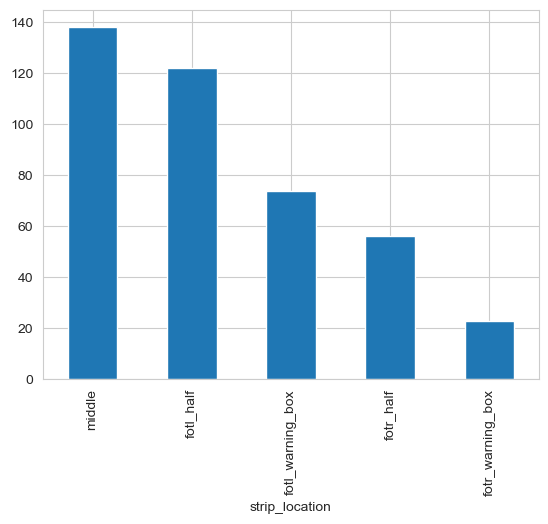

In [11]:
epee_fotr = epee[epee['initiated'] == 'fotr']
epee_fotr['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

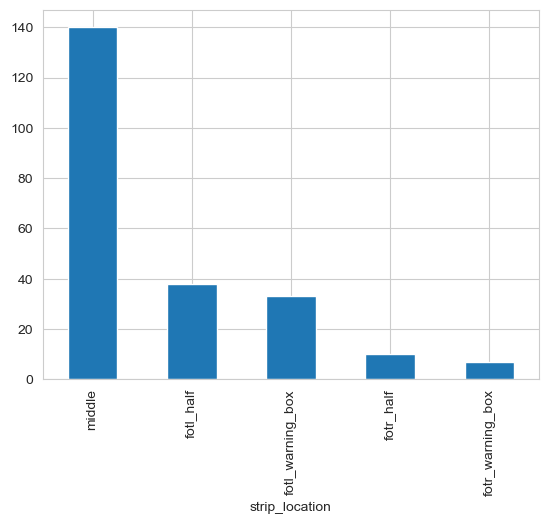

In [12]:
saber_fotr = saber[saber['initiated'] == 'fotr']
saber_fotr['strip_location'].value_counts().plot(kind='bar')


<Axes: xlabel='strip_location'>

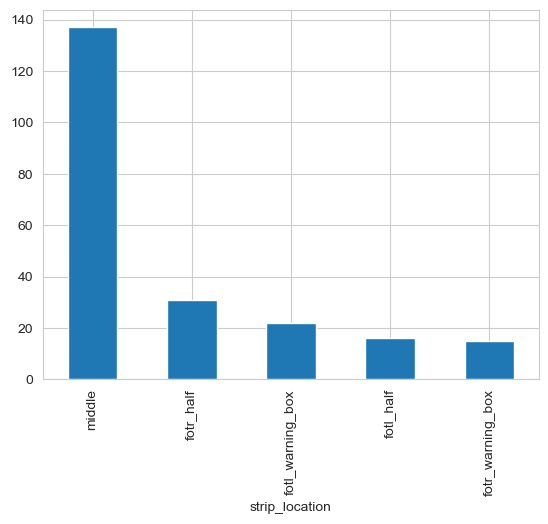

In [13]:
saber_fotl = saber[saber['initiated'] == 'fotl']
saber_fotl['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

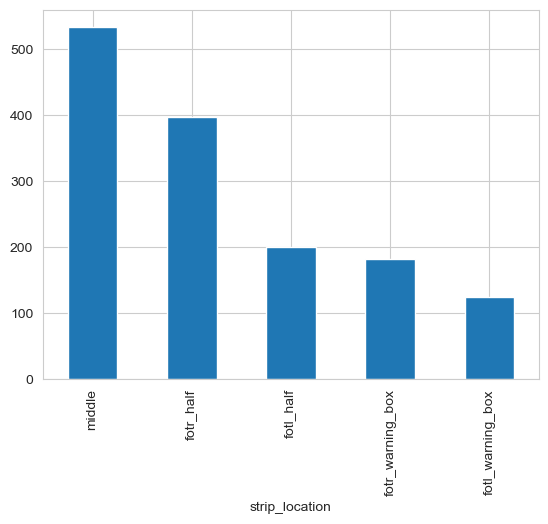

In [3]:
foil_fotl = foil[foil['initiated'] == 'fotl']
foil_fotl['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

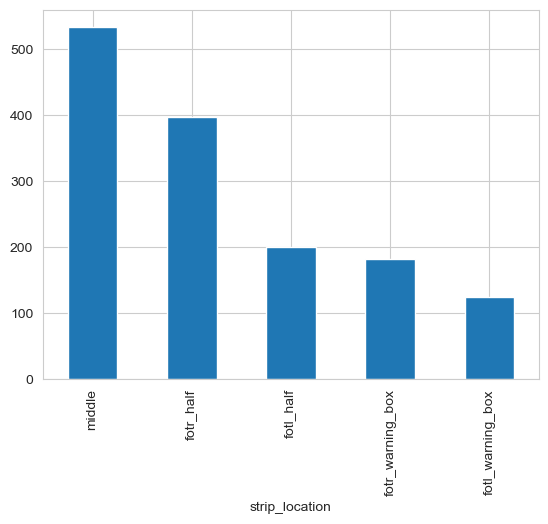

In [4]:
foil_fotr = foil[foil['initiated'] == 'fotl']
foil_fotl['strip_location'].value_counts().plot(kind='bar')